In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
trainbbc_df=pd.read_csv('/content/drive/MyDrive/ml_project/BBC News Train.csv')

In [ ]:
dataset1_df=pd.read_csv("/content/drive/MyDrive/ml_project/News_Category_Dataset.csv")

In [ ]:
dataset1_df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,26/05/18
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,26/05/18
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,26/05/18
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,26/05/18
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",26/05/18


In [ ]:
print(trainbbc_df.shape)
print(dataset1_df.shape)


(1490, 3)
(10000, 6)


In [ ]:
trainbbc_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


1.soring ArticleIds and putting them as index
2.droping previous index and ArticleId
3.we previously have sport in category we changed it to sports


**pre-processing**

In [ ]:
trainbbc_df=trainbbc_df.sort_values('ArticleId')
trainbbc_df.reset_index(inplace=True)
trainbbc_df.drop(columns=['index','ArticleId'],inplace=True)
temp=trainbbc_df.copy()
for i in range(trainbbc_df.shape[0] ):
  if  temp.iloc[i,temp.columns.get_loc('Category')]=="sport":
    temp.iloc[i,temp.columns.get_loc('Category')]="sports"

trainbbc_df=temp
trainbbc_df.head()

,Text,Category
0,worldcom boss left books alone former worldc...,business
1,yeading face newcastle in fa cup premiership s...,sports
2,blair prepares to name poll date tony blair is...,politics
3,last star wars not for children the sixth an...,entertainment
4,berlin cheers for anti-nazi film a german movi...,entertainment


Checked null values.there is no null values in this dataset

In [ ]:
trainbbc_df.isna().sum()

Text        0
Category    0
dtype: int64

Number of articles in each category.

In [ ]:
trainbbc_df['Category'].value_counts()

sports           346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

1.dropped authors,link,date columns to append the dataset1 to traindata for getting more categories and articles and they dont have role for further work.
2.changed the column names according to train dataset, i.e(category - Category) and (headline - Text).



In [ ]:
dataset1_df.drop(columns=[ 'authors', 'link','date'],inplace=True)
dataset1_df.rename(
    columns={
        'category':'Category',
        'headline': 'Text'
    }, inplace=True
)
dataset1_df.columns

Index(['Category', 'Text', 'short_description'], dtype='object')

1.we observed in dataset1 categories are in capitals, we changed them to small
2.we added short_description to text because to get similar to train dataset

In [ ]:
temp=dataset1_df.copy()
for i in range(temp.shape[0]):
  temp.iloc[i,temp.columns.get_loc('Category')] =  temp.iloc[i,temp.columns.get_loc('Category')].lower()
  temp.iloc[i,temp.columns.get_loc('Text')]=temp.iloc[i,temp.columns.get_loc('Text')]+" "+temp.iloc[i,temp.columns.get_loc('short_description')]

dataset1_df=temp


Dropped short_description column

In [ ]:
dataset1_df.drop(columns='short_description',inplace=True)

we finally have dataset1 after preprocessing which is quite similar to train dataset

In [ ]:
dataset1_df.head()

,Category,Text
0,crime,There Were 2 Mass Shootings In Texas Last Week...
1,entertainment,Will Smith Joins Diplo And Nicky Jam For The 2...
2,entertainment,Hugh Grant Marries For The First Time At Age 5...
3,entertainment,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,entertainment,Julianna Margulies Uses Donald Trump Poop Bags...


In [ ]:

dataset1_df.head()
print(dataset1_df.shape)

(10000, 2)


Adding trainbbc.csv to dataset1.csv'

In [ ]:
dataset_df=dataset1_df.append(trainbbc_df)


**Data** **Analysis**

Final dataset after appending.

In [ ]:
dataset_df

,Category,Text
0,crime,There Were 2 Mass Shootings In Texas Last Week...
1,entertainment,Will Smith Joins Diplo And Nicky Jam For The 2...
2,entertainment,Hugh Grant Marries For The First Time At Age 5...
3,entertainment,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,entertainment,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
1485,sports,davies favours gloucester future wales hooker ...
1486,business,beijingers fume over parking fees choking traf...
1487,business,cars pull down us retail figures us retail sal...
1488,entertainment,rem announce new glasgow concert us band rem h...


1. we have dropped some columns having text size lessthan 15.2.calculated no of categories present we have and how many articles on them


In [ ]:
veryless=15
cpy=dataset_df.copy()
count=0
word_count=[]
for i in range(len(cpy)):
  wc=len(cpy.iloc[i,cpy.columns.get_loc('Text')].split())
  if wc<veryless:
    count=count+1
  word_count.append(wc)
print(count," rows dropped")
cpy['word_count']=word_count

cpy= cpy[cpy['word_count'] >= veryless]
cpy.drop(columns=['word_count'],inplace=True)
dataset_df=cpy

print("All Categories We have now :")
print(dataset_df['Category'].value_counts())
print()
print("Number of Categories We have Now is : ")
len(dataset_df['Category'].value_counts())

462  rows dropped
All Categories We have now :
politics          3790
entertainment     2028
sports             707
world news         668
queer voices       504
comedy             443
business           442
black voices       435
tech               325
media              321
women              267
weird news         210
crime              197
latino voices      104
impact              79
religion            74
green               65
travel              64
style               60
parents             58
healthy living      47
science             45
education           39
taste               30
arts & culture      23
college              3
Name: Category, dtype: int64

Number of Categories We have Now is : 


26

11490 - 462 = 11028

In [ ]:
dataset_df.shape

(11028, 2)

splitted the dataset into train and test with ration 80:20 respectively.

In [ ]:
training_data=dataset_df.sample(frac=0.8,random_state=69)
testing_data=dataset_df.drop(training_data.index)
training_data.reset_index(inplace=True)
testing_data.reset_index(inplace=True)
print(training_data.shape)
print(testing_data.shape)


(8822, 3)
(1770, 3)


In [ ]:
display(training_data.head())
print(training_data.shape)
display(testing_data.head())
print(testing_data.shape)

,index,Category,Text
0,4294,politics,Trump: Outgoing Economic Adviser Is ‘A Globali...
1,3265,entertainment,The 'Roseanne' Revival Catches Up To Our Thorn...
2,283,sports,strachan turns down pompey former southampton ...
3,171,politics,crucial decision on super-casinos a decision o...
4,1199,entertainment,super size me wins writers award super size m...


(8822, 3)


,index,Category,Text
0,24,world news,2 Men Detonate Bomb Inside Indian Restaurant N...
1,36,politics,How The Chinese Exclusion Act Can Help Us Unde...
2,95,politics,Trump Lawyer Attended DOJ Meeting On Confident...
3,99,politics,Chrissy Teigen Taunts Donald Trump Over Twitte...
4,130,politics,House Democrats Offer Internships For Students...


(1770, 3)


In [ ]:
print("All Categories We have now :")
print(dataset_df['Category'].value_counts())
print()
print("Number of Categories We have Now is : ")
print(len(dataset_df['Category'].value_counts()))

All Categories We have now :
politics          3790
entertainment     2028
sports             707
world news         668
queer voices       504
comedy             443
business           442
black voices       435
tech               325
media              321
women              267
weird news         210
crime              197
latino voices      104
impact              79
religion            74
green               65
travel              64
style               60
parents             58
healthy living      47
science             45
education           39
taste               30
arts & culture      23
college              3
Name: Category, dtype: int64

Number of Categories We have Now is : 
26


analysis of above cell data.

In [ ]:
temp=dataset_df['Category'].value_counts().to_frame().reset_index()
print("Mean articles per category : ", temp['Category'].mean())
print("Standard Deviation : ",temp['Category'].std())
print("____________________________________________________")
print("Category with Least Number of Articles : ")
print("Category : "+ temp.iloc[temp['Category'].idxmin()]['index'])
print("Count : ", temp.iloc[temp['Category'].idxmin()]['Category'])
print("____________________________________________________")
print("Category with Most Number of Articles : ")
print("Category : "+ temp.iloc[temp['Category'].idxmax()]['index'])
print("Count : ", temp.iloc[temp['Category'].idxmax()]['Category'])

Mean articles per category :  424.15384615384613
Standard Deviation :  799.7028794399928
____________________________________________________
Category with Least Number of Articles : 
Category : college
Count :  3
____________________________________________________
Category with Most Number of Articles : 
Category : politics
Count :  3790


In [ ]:
temp

,index,Category
0,politics,3790
1,entertainment,2028
2,sports,707
3,world news,668
4,queer voices,504
5,comedy,443
6,business,442
7,black voices,435
8,tech,325
9,media,321


**Visualisation**

Text(0, 0.5, 'Categories')

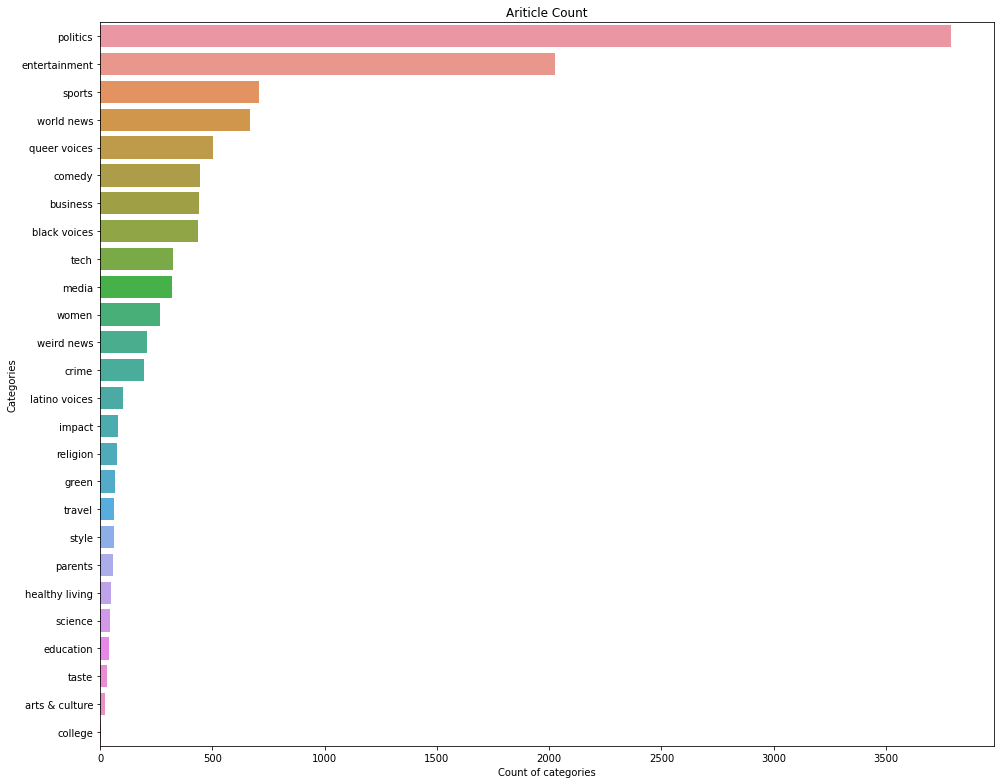

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 11)
ax=sns.barplot(data=temp,y='index',x='Category',ax=ax);
ax.set_title('Ariticle Count')
ax.set_xlabel('Count of Articles')
ax.set_ylabel('Categories')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


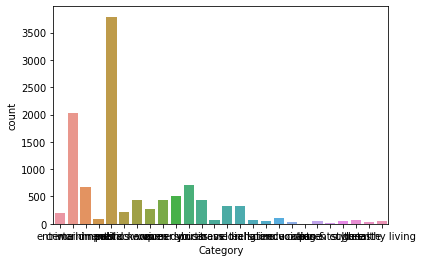

In [ ]:
sns.countplot(dataset_df.Category)

In [ ]:
train_copy=training_data.copy()
count=0
word_count=[]
for i in range(len(train_copy)):
  wc=len(train_copy.iloc[i,train_copy.columns.get_loc('Text')].split())
  if wc<15:
    count=count+1
  word_count.append(wc)
train_copy['word_count']=word_count
print("Average Words per article : ", train_copy['word_count'].mean())
print("Std of Words per article : ", train_copy['word_count'].std())
print("Article that have Maximum words : ", train_copy['word_count'].max())
print("Article that have Minimum words : ", train_copy['word_count'].min())

Average Words per article :  73.63693040126955
Std of Words per article :  144.04424842281148
Article that have Maximum words :  3345
Article that have Minimum words :  15


In [ ]:
train_copy

,index,Category,Text,word_count
0,4294,politics,Trump: Outgoing Economic Adviser Is ‘A Globali...,23
1,3265,entertainment,The 'Roseanne' Revival Catches Up To Our Thorn...,34
2,283,sports,strachan turns down pompey former southampton ...,255
3,171,politics,crucial decision on super-casinos a decision o...,194
4,1199,entertainment,super size me wins writers award super size m...,284
...,...,...,...,...
8817,4125,entertainment,Michael Caine Says He Won't Work With Woody Al...,20
8818,6266,sports,Larry Nassar Sentenced To 40 To 125 Years On 3...,28
8819,5007,sports,Pita Taufatofua Goes Shirtless One Last Time F...,22
8820,2960,entertainment,Ted Nugent Says Parkland Survivors Are ‘Liars’...,26


Text(0.5, 1.0, 'Mean Word count for Each Category ')

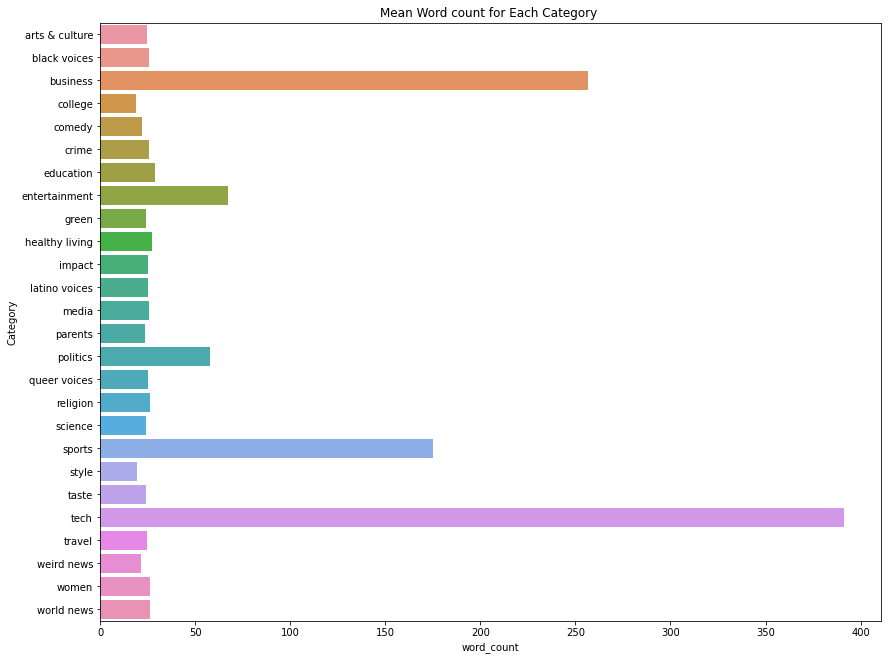

In [ ]:
mean_cat=train_copy.groupby('Category').mean().reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(14, 11)
ax=sns.barplot(data=mean_cat,x='word_count',y='Category')
ax.set_title('Mean Word count for Each Category ')

In [ ]:
mean_cat

,Category,index,word_count
0,arts & culture,8575.684211,24.684211
1,black voices,4330.337989,25.748603
2,business,1841.258427,256.567416
3,college,7982.000000,19.000000
4,comedy,4247.137143,22.262857
5,crime,4284.678571,25.625000
6,education,4668.470588,29.000000
7,entertainment,4070.113219,67.363525
8,green,8844.634615,24.076923
9,healthy living,8939.738095,27.071429


In [ ]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

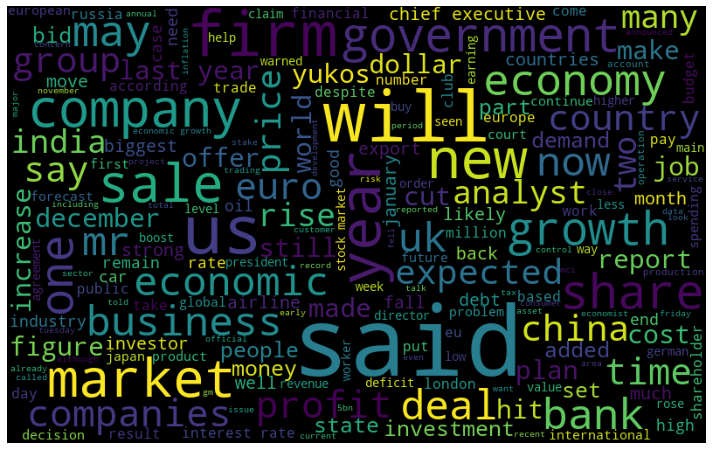

In [ ]:
subset=dataset_df[dataset_df.Category=="business"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

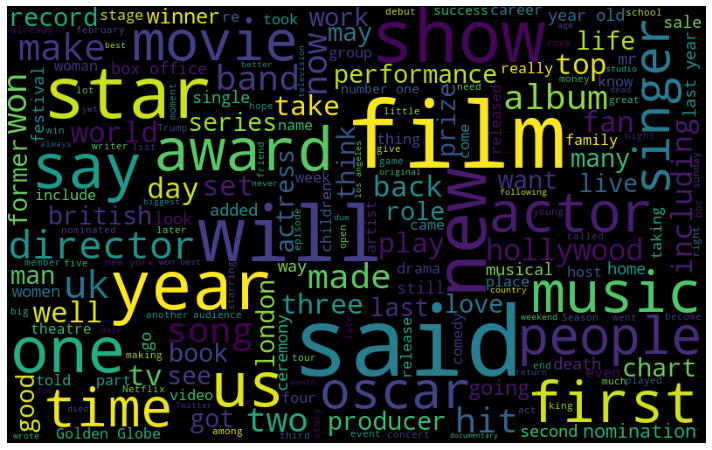

In [ ]:
subset=dataset_df[dataset_df.Category=="entertainment"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

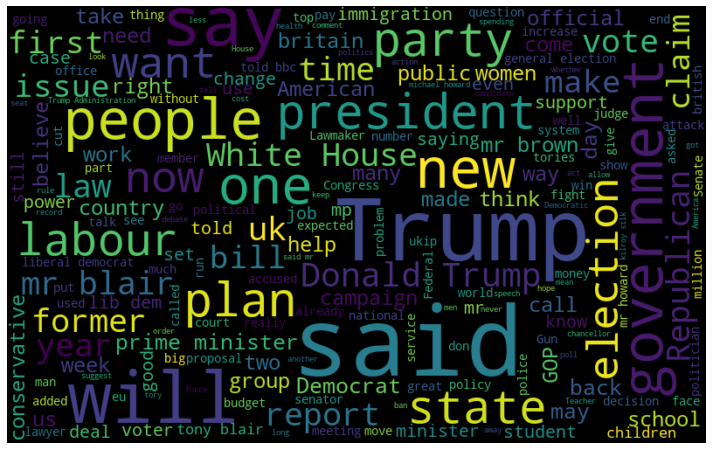

In [ ]:
subset=dataset_df[dataset_df.Category=="politics"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09b5b4ccd0>],
      dtype=object)

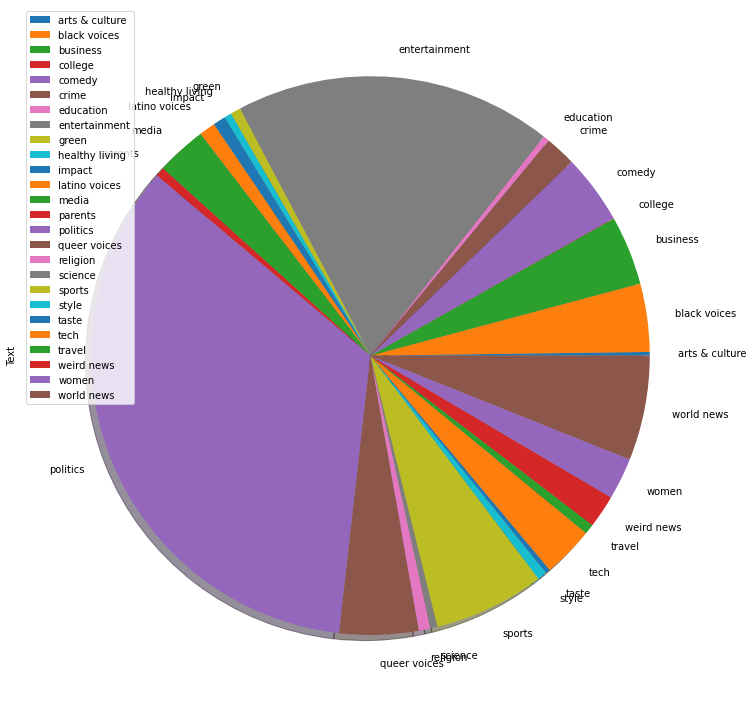

In [ ]:
dataset_df.groupby(['Category']).count().plot(kind='pie',shadow = True,figsize=(20, 10),subplots=True)

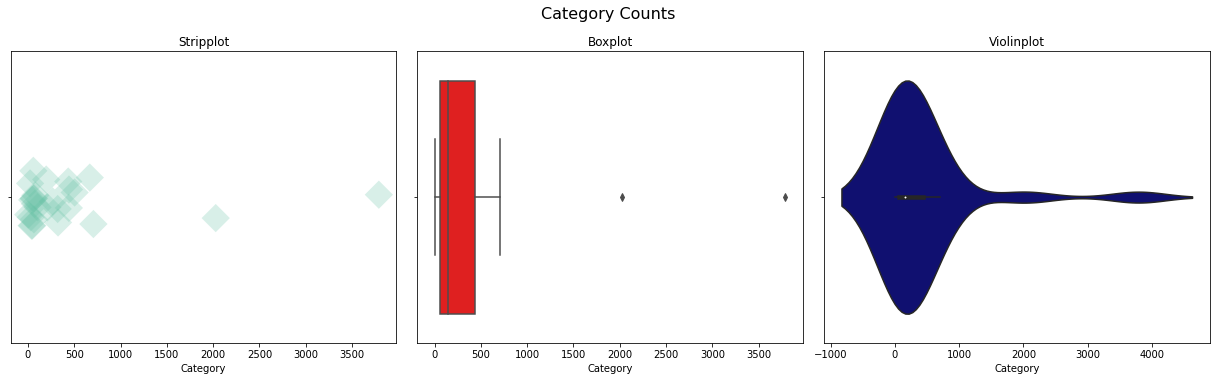

In [ ]:
plt.rcParams["figure.figsize"] = [17, 5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 3)
fig.suptitle("Category Counts", fontsize=16,y=1.05)
axes[0].set_title("Stripplot")
axes[1].set_title("Boxplot")
axes[2].set_title("Violinplot")

sns.stripplot(x=temp['Category'], palette="Set2", size=20, marker="D",edgecolor="gray", alpha=.25,ax=axes[0])
sns.boxplot(x=temp['Category'],ax=axes[1],color='red')
sns.violinplot(x=temp['Category'],ax=axes[2],color='navy')